# Ejercicio 1

Sabiendo que la clase Libro tiene los métodos obtener_autor y obtener_titulo que devuelven cadenas de caracteres, escribir la clase Biblioteca con los métodos: A agregar_libro que recibe un Libro y lo agrega a la colección. B sacar_libro que recibe el nombre de un título y el de un autor y lo saca de la biblioteca, devolviéndolo o imprimiendo en caso de que los datos no correspondan con los de algún libro agregado. C contiene_libro que recibe el nombre de un título y el de un autor y devuelve True o False de acuerdo a si está en la colección o no.

In [ ]:
class Libro:
    """Crea un libro nuevo"""
    def __init__(self, autor: str, titulo: str) -> None:
        self.autor = autor
        self.titulo = titulo

    def obtener_autor (self) -> str:
        return self.autor

    def obtener_titulo(self) -> str:
        return self.titulo


class Biblioteca:
    """Crea una biblioteca vacía como una lista de listas [autor, título]"""
    def __init__(self) -> None:
        self.coleccion = []

    def agregar_libro(self, autor: str, titulo: str) -> None:
        nuevo_libro = [autor, titulo]
        self.coleccion.append(nuevo_libro)

    def sacar_libro(self, autor: str, titulo: str) -> str:
        for libro in self.coleccion:
            if libro[0] == autor and libro[1] == titulo:
                self.coleccion.remove(libro)
                return(f"Se ha retirado el libro: '{titulo}' de {autor}")
                #return
        return("El libro no se encuentra en la biblioteca")


    def contiene_libro(self, autor: str, titulo: str) -> bool:
        for libro in self.coleccion:
            if libro[0] == autor and libro[1] == titulo:
                return True
        return False

    def imprimir_libros(self) -> None:
        print("Lista de libros de la biblioteca:")
        for libro in self.coleccion:
            print(f"Autor: {libro[0]} - Título: {libro[1]}")


In [ ]:
bibliotecaArgentina = Biblioteca()

In [ ]:
bibliotecaArgentina.agregar_libro("Jorge Luis Borges", "El Aleph")
bibliotecaArgentina.agregar_libro("Julio Cortázar", "Rayuela")
bibliotecaArgentina.agregar_libro("Ernesto Sabato", "Sobre héroes y tumbas")
bibliotecaArgentina.agregar_libro("Adolfo Bioy Casares", "La invención de Morel")
bibliotecaArgentina.agregar_libro("Jorge Luis Borges", "Ficciones")
bibliotecaArgentina.agregar_libro("José Hernández", "Martín Fierro")
bibliotecaArgentina.agregar_libro("Ernesto Sabato", "El túnel")

In [ ]:
bibliotecaArgentina.imprimir_libros()

Lista de libros de la biblioteca:
Autor: Jorge Luis Borges - Título: El Aleph
Autor: Julio Cortázar - Título: Rayuela
Autor: Ernesto Sabato - Título: Sobre héroes y tumbas
Autor: Adolfo Bioy Casares - Título: La invención de Morel
Autor: Jorge Luis Borges - Título: Ficciones
Autor: José Hernández - Título: Martín Fierro
Autor: Ernesto Sabato - Título: El túnel


In [ ]:
bibliotecaArgentina.sacar_libro("Julio Cortázar", "Rayuela")
bibliotecaArgentina.sacar_libro("Ernesto Sabato", "Sobre héroes y tumbas")
bibliotecaArgentina.sacar_libro("nfjdsinf", "ndjsini")

'El libro no se encuentra en la biblioteca'

In [ ]:
bibliotecaArgentina.imprimir_libros()

Lista de libros de la biblioteca:
Autor: Jorge Luis Borges - Título: El Aleph
Autor: Adolfo Bioy Casares - Título: La invención de Morel
Autor: Jorge Luis Borges - Título: Ficciones
Autor: José Hernández - Título: Martín Fierro
Autor: Ernesto Sabato - Título: El túnel


In [ ]:
#bibliotecaArgentina.contiene_libro("nfdjanf", "ncdjos")
bibliotecaArgentina.contiene_libro("Ernesto Sabato", "Sobre héroes y tumbas")
bibliotecaArgentina.contiene_libro("José Hernández", "Martín Fierro")

True

# Ejercicio 2

Implemente para la clase Lista Enlazada, un método intercambiar(i, j) que reciba dos índices válidos i y j, e intercambie los valores en las posiciones i y j. Nota: Puede considerar que están definidos todos los métodos de la interfaz de Lista (__str__, __len__, append, insert, remove, pop e index). class ListaEnlazada: ... def intercambiar(self, i: int, j: int)-> None: # COMPLETAR ...

In [ ]:
from typing_extensions import Self
from typing import Any


class _Nodo:
    """Crea un nuevo nodo"""
    def __init__(self, dato: Any = None, prox=None):
        self.dato = dato
        self.prox = prox

    def __str__(self):
        return str(self.dato)


class ListaEnlazada:
    """Modela una lista enlazada."""

    def __init__(self) -> None:
        """Crea una lista enlazada vacía."""
        # referencia al primer nodo ( None si la lista está vacía)
        self.prim = None
        # cantidad de elementos de la lista
        self.len = 0


    def insert(self, i: int, x: Any) -> None:
        """Inserta el elemento x en la posición i.
        Si la posición es inválida, imprime un error y retorna inmediatamente"""
        if i < 0 or i > self.len:
            print("Posición inválida")
            return
        nuevo = _Nodo(x)
        if i == 0:
            # Caso particular: insertar al principio
            nuevo.prox = self.prim
            self.prim = nuevo
        else:
            # Buscar el nodo anterior a la posición deseada
            n_ant = self.prim
            for pos in range(1, i):
                n_ant = n_ant.prox
            # Intercalar el nuevo nodo
            nuevo.prox = n_ant.prox
            n_ant.prox = nuevo
        self.len += 1


    def pop(self, i: int | None = None) -> Any:
        """Elimina el nodo de la posición i, y devuelve el dato contenido.
        Si i está fuera de rango, se muestra un mensaje de error y se
        retorna inmediatamente. Si no se recibe la posición, devuelve el
        último elemento."""
        if i is None:
            i = self.len - 1
        if i < 0 or i >= self.len:
            print("Posición inválida")
            return
        if i == 0:
            # Caso particular: saltear la cabecera de la lista
            dato = self.prim.dato
            self.prim = self.prim.prox
        else:
            # Buscar los nodos en las posiciones (i -1) e (i)
            n_ant = self.prim
            n_act = n_ant.prox
            for pos in range(1, i):
                n_ant = n_act
                n_act = n_ant.prox
            # Guardar el dato y descartar el nodo
            dato = n_act.dato
            n_ant.prox = n_act.prox
            self.len -= 1
        return dato


    def remove(self, x: Any) -> None:
        """Borra la primera aparición del valor x en la lista .
        Si x no está en la lista, imprime un mensaje de error y retorna
        inmediatamente."""
        if self.len == 0:
            print("La lista esta vacía")
            return
        if self.prim.dato == x:
            # Caso particular: saltear la cabecera de la lista
            self.prim = self.prim.prox
        else:
            # Buscar el nodo anterior al que contiene a x ( n_ant )
            n_ant = self.prim
            n_act = n_ant.prox
            while n_act is not None and n_act.dato != x:
                n_ant = n_act
                n_act = n_ant.prox
            if n_act == None:
                print("El valor no está en la lista.")
                return
            # Descartar el nodo
            n_ant.prox = n_act.prox
            self.len -= 1


    def __len__(self) -> int:
        """Devuelve la longitud de la lista"""
        return self.len


    def __str__(self):
        """Crea una representación para imprimir en pantalla"""
        s = "["
        nodo = self.prim
        for _ in range(self.len):
            s += str(nodo) + " -> "
            nodo = nodo.prox
        s += "]"
        return s


    def index(self, x: Any) -> int:
        """Devuelve el índice de un elemento a partir de su dato"""
        if self.len == 0:   # caso especial: la lista está vacía
            print("La lista esta vacía")
            return
        else:
            nodo_actual = self.prim
            indice = 0
            while nodo_actual is not None:  # se recorre toda la lista
                if nodo_actual.dato == x:
                    return indice
                else:
                    nodo_actual = nodo_actual.prox
                    indice += 1
            print("El elemento no se encuentra en la lista")
            return


    def append(self, x: Any) -> None:
        """Agrega un nuevo nodo al final de la lista"""
        nuevo = _Nodo(x)
        # caso especial: la lista está vacía
        if self.len == 0:
            nuevo = self.prim   # el nuevo nodo es el primer nodo
        else:
            ultimo = self.prim
            while ultimo.prox is not None:  # se recorre la lista hasta el último nodo
                ultimo = ultimo.prox
            ultimo.prox = nuevo     # se actualiza el nodo
        self.len += 1


    def intercambiar(self, i: int, j: int) -> None:
        """Intercambia los valores de las posiciones i y j"""
        if i == j:  # Si es el mismo índice no hay nada que hacer
            return
        # Indices fuera de rango
        if i < 0 or j < 0 or i >= self.len or j >= self.len:
            print("Los índices son inválidos")
            return

        # Encontrar los nodos en las posiciones i y j
        nodo_i = self.prim
        for nodo in range(i):
            nodo_i = nodo_i.prox

        nodo_j = self.prim
        for nodo in range(j):
            nodo_j = nodo_j.prox

        # Intercambiar los valores de los nodos
        nodo_i.dato = nodo_j.dato
        nodo_j.dato = nodo_i.dato


In [ ]:
miLista = ListaEnlazada()
miLista.insert(0, "banana")
miLista.insert(1, "manzana")
miLista.insert(2, "pera")
miLista.insert(3, "naranja")
print(miLista)
miLista.append("violeta")
print(miLista)
miLista.append("azul")
print(miLista)
print(miLista.len)
print(miLista.index("violeta"))
miLista.pop(2)
print(miLista)
miLista.remove("naranja")
print(miLista)
miLista.intercambiar(0,3)
print(miLista)

[banana -> manzana -> pera -> naranja -> ]
[banana -> manzana -> pera -> naranja -> violeta -> ]
[banana -> manzana -> pera -> naranja -> violeta -> azul -> ]
6
4
[banana -> manzana -> naranja -> violeta -> azul -> ]
[banana -> manzana -> violeta -> azul -> ]
[azul -> manzana -> violeta -> azul -> ]


# Ejercicio 3

Implemente una función reflexión, que recibe un árbol binario y devuelve un árbol donde, para cada nodo, su hijo izquierdo es reemplazado por su hijo derecho, y viceversa.

In [ ]:
def reflexion(Tree) -> Tree:
    pass

# Ejercicio 4

Considere el siguiente árbol 8 3 10 1 6 14 4 7

1. Decida si se trata o no de un árbol binario de búsqueda.

2. Si se trata de un árbol binario de búsqueda, inserte el valor 13 en el mismo. Si no se trata de un árbol binario de búsqueda, justifique porqué.

Es un árbol binario de búsqueda porque es un árbol binario, es decir, cada uno de sus nodos tiene a lo sumo 2 hijos, y además cada elemento a la izquierda de un nodo es menor que él y cada elemento a la derecha de un nodo, es mayor que él.

In [ ]:
import graphviz
from typing import Any

class Tree:
    def __init__(self, cargo, left = None, right = None):
        self.cargo = cargo
        self.left = left
        self.right = right


    def nodos(self) -> int:
        """Recorre el árbol y cuenta los nodos"""

        if self.cargo == None:
            return "Arbol vacío"

        elif self.left is None and self.right is None:
            return 1

        elif self.left is None:
            return 1 + self.right.nodos()

        elif self.right is None:
            return 1 + self.left.nodos()

        else:
            return 1 + self.left.nodos() + self.right.nodos()


    def menor_mayor(self) -> tuple:
        """Devuelve el menor y el mayor elemento de un árbol en una tupla"""

        if self.left is None and self.right is None:
            return (self.cargo, self.cargo)

        elif self.left is None:
            rmin, rmax = self.right.menor_mayor()
            return (min(self.cargo, rmin), max(self.cargo, rmax))

        elif self.right is None:
            lmin, lmax = self.left.menor_mayor()
            return (min(self.cargo, lmin), max(self.cargo, lmax))

        else:
            rmin, rmax = self.right.menor_mayor()
            lmin, lmax = self.left.menor_mayor()
            return (min(self.cargo, lmin, rmin), max(self.cargo, lmax, rmax))


    def buscar(self, elemento: Any) -> bool:
        """Busca si un elemento está o no en el árbol"""

        if self.cargo == elemento:
            return True

        if self.left is not None:
            if self.left.buscar(elemento):
                return True

        if self.right is not None:
            if self.right.buscar(elemento):
                return True

        return False


    def altura(self) -> int:
        """Calcula la altura del árbol"""
        if self.left is None and self.right is None:
             return 0

        elif self.left is None:
            return 1 + self.right.altura()

        elif self.right is None:
            return 1 + self.left.altura()

        return 1 + max(self.left.altura(), self.right.altura())



    def graph_tree(self, dot = None):
        if dot is None:
            dot = graphviz.Digraph(comment='Binary Tree')
        # Agregar el nodo actual al gráfico
        dot.node(str(self.cargo))
        # Agregar nodos para los hijos izquierdo y derecho (si existen)
        if self.left:
            dot.edge(str(self.cargo), str(self.left.cargo))
            self.left.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')
        if self.right:
            dot.edge(str(self.cargo), str(self.right.cargo))
            self.right.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')
        return dot


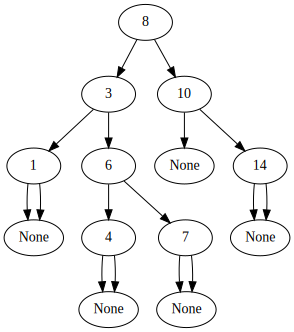

In [ ]:
arbol1 = Tree(8,Tree(3,Tree(1),Tree(6,Tree(4),Tree(7))),Tree(10,None,Tree(14)))
arbol1.graph_tree()

# Parcial 1

1) Se necesita desarrollar un programa para gestionar una lista de estudiantes de una escuela. Se desea implementar una clase llamada Estudiante que tenga los métodos obtener_legajo y obtener_nombre para obtener el legajo y el nombre del estudiante respectivamente.

Además se debe implementar una clase llamada Escuela con los siguientes métodos:

a) agregar_estudiante: recibe un objeto Estudiante y lo agrega a la lista de estudiantes de la escuela.

b) eliminar_estudiante: recibe el legajo de un estudiante y lo elimina de la lista de estudiantes de la escuela.

c) buscar_estudiante: recibe el legajo de un estudiante y devuevle True si el estudiante está en la lista de la escuela, False en caso contrario

Nota: consideramos que el legajo es un identificador único dentro de cada escuela.

In [18]:
class Estudiante:
    """Crea un nuevo estudiante"""
    def __init__(self, legajo: str, nombre: str) -> None:
        self.legajo = legajo
        self.nombre = nombre

    def obtener_legajo(self) -> str:
        return self.legajo

    def obtener_nombre(self) -> str:
        return self.nombre


class Escuela:
    """Crea una nueva escuela como una lista de listas [legajo, nombre]"""
    def __init__(self) -> None:
        self.estudiantes = []

    def agregar_estudiante(self, x: Estudiante) -> None:
        self.estudiantes.append([x.obtener_legajo(), x.obtener_nombre()])

    def eliminar_estudiante(self, legajo: str) -> None:
        for estudiante in self.estudiantes:
            if estudiante[0] == legajo:
                self.estudiantes.remove(estudiante)
                return f"El estudiante con legajo {legajo} ha sido eliminado con éxito"
        return f"El estudiante con legajo {legajo} no se encuentra en la lista"

    def buscar_estudiante(self, legajo) -> bool:
        for estudiante in self.estudiantes:
            if estudiante[0] == legajo:
                return True
        return False



In [25]:
est1 = Estudiante("a-4501/2", "Fabian Alvarez")
est2 = Estudiante("b-3401/3", "Elsa Queo")
est3 = Estudiante("s-5419/5", "Rosa Meltrozo")
est4 = Estudiante("w-8711/7", "Bo Balicon")
est5 = Estudiante("d-9912/5", "Homero Simpson")

laMerced = Escuela()

laMerced.agregar_estudiante(est1)
laMerced.agregar_estudiante(est2)
laMerced.agregar_estudiante(est3)
laMerced.agregar_estudiante(est4)
laMerced.agregar_estudiante(est5)

In [28]:
laMerced.buscar_estudiante("d-9912/5")

True

In [29]:
laMerced.eliminar_estudiante("a-4501/2")

'El estudiante con legajo a-4501/2 ha sido eliminado con éxito'

In [30]:
laMerced.buscar_estudiante("a-4501/2")

False

2) Implemente una función que reciba una lista enlazada L que contiene números enteros y un número entero k y devuelva una nueva lista enlazada en la que para cada posición i de dicha lista enlazada, contenga el resultado de la suma de i y los k - 1 elementos anteriores a i. En las primeras k - 1 posiciones, devolver la suma parcial hasta dicho momento. La función de debe ser pura, es decir, no debe modificar la lista recibida por parámetro.

Por ejemplo, si se llama a la función con la lista 1->2->3->4->5 y k=3, el resultado debería ser 1->3->6->9->12

Nota: Puede condiderar que están definidos todos los métodos de la interfaz de lista (str, len, append, insert, remove, pop, index)


In [ ]:
def funcionE2(L: list, k: int) -> list:
    pass

3) Implemente una función que reciba un árbol binario A y que dado un valor entero M, una clave inicial inicio y una clave final fin, devuelva una lista con todos los datos cuyas clavesestén entre inicio y fin, que estén dentro de los primeros M niveles del árbol (considerando a la raíz el nivel 0).

Por ejemplo dado el siguiente árbol, inicio = 5, fin = 15 y M = 2, debería dar la lista [6, 8, 10, 14]. 1 y 3 quedan afuera porque son menores que inicio, 4 y 7 quedan afuera porque están en el nivel 3.

Ayuda: Defina la función de manera recursiva e incorpore un parámetro para control del nivel actual.